# Dummy dataset

* Find this notebook at `EpyNN/nnlive/dummy_image/prepare_dataset.ipynb`. 
* Regular python code at `EpyNN/nnlive/dummy_image/prepare_dataset.py`.

This notebook is the fourth of the series on preparing data for Neural Network regression with EpyNN.

In addition to the topic-specific content, it contains several explanations about basics or general concepts in programming that are important in the context.

Note that elements developed in dummy dataset [with Boolean](../dummy_boolean/prepare_dataset.ipynb), [with string](../dummy_string/prepare_dataset.ipynb) and [with numerical (time-series)](../dummy_time/prepare_dataset.ipynb) features may not be recalled herein.

## What is an image?

Instinctively, an image may resemble to a 2D plane composed of **WIDTH * HEIGHT** colored units arranged together in a particular manner.

In computing, a 2D image is generally a 3D object which is composed of **WIDTH * HEIGHT** units within each plane with respect the the third dimension, which is the **DEPTH** of the image, therefore giving **WIDTH * HEIGHT * DEPTH = N_FEATURES**.

Image depth is simply the number of channels which compose the image. You are certainly aware of RGB colors, for instance. In the RGB scheme, one color is written such as ``rgb(int, int, int)`` or ``rgb(255, 0, 0)``, ``rgb(0, 255, 0)`` and ``rgb(0, 0, 255)`` for pure red, green and blue, respectively. One RGB image would therefore have a **depth** equal to 3, because three channels in there.

Note that following this scheme, an image is made of Numerical data, namely integer or ``int``. 

## Why preparing a dummy dataset with ... features?

In addition to the general interest of dummy dataset explained in [dummy dataset with boolean sample features](../dummy_boolean/prepare_dataset.ipynb#Why-preparing-a-dummy-dataset-with-Boolean-features).

## Prepare a set of image sample features and related label

### Imports

In [1]:
# EpyNN/nnlive/dummy_image/prepare_dataset.ipynb
# Standard library imports
import random

# Related third party imports
import matplotlib.pyplot as plt
import numpy as np

### Seeding

In [2]:
random.seed(0)
np.random.seed(1)

### Generate features

In [3]:
def features_image(WIDTH=28, HEIGHT=28):
    """Generate dummy image features.

    :param WIDTH: Image width, defaults to 28.
    :type WIDTH: int

    :param HEIGHT: Image height, defaults to 28.
    :type HEIGHT: int

    :return: Random image features of size N_FEATURES.
    :rtype: :class:`numpy.ndarray`

    :return: Non-random image features of size N_FEATURES.
    :rtype: :class:`numpy.ndarray`
    """
    # Number of channels is one for greyscale images
    DEPTH = 1

    # Number of features describing a sample
    N_FEATURES = WIDTH * HEIGHT * DEPTH

    # Number of distinct tones in features
    N_TONES = 16

    # Shades of grey
    GSCALE = [i for i in range(N_TONES)]

    # Random choice of shades for N_FEATURES iterations
    features = [random.choice(GSCALE) for j in range(N_FEATURES)]

    # Vectorization of features
    features = np.array(features).reshape(HEIGHT, WIDTH, DEPTH)

    # Masked features
    mask_on_features = features.copy()
    mask_on_features[np.random.randint(0, HEIGHT)] = np.zeros_like(features[0])
    mask_on_features[:, np.random.randint(0, WIDTH)] = np.zeros_like(features[:, 0])

    # Random choice between random image or masked image
    features = random.choice([features, mask_on_features])

    return features, mask_on_features

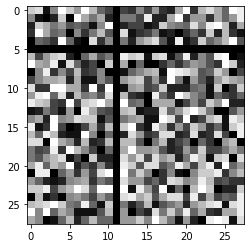

In [4]:
features, mask_on_features = features_image()

plt.imshow(features, cmap='gray')
plt.show()

This is the image features we retrieve for one sample. 

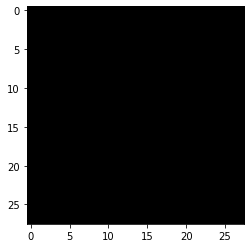

In [5]:
plt.imshow(features - mask_on_features, cmap='gray')
plt.show()

When subtracting ``mask_on_features`` from ``features``, we observe that the image is all black - is not all zeros -. This means that the random choice here has selected the non-random image, the one that has been alterated during the generation of image sample features.

### Generate label

In [6]:
def label_features(features, mask_on_features):
    """Prepare label associated with features.

    The dummy law is:

    Image is NOT random = positive
    Image is random = negative

    :param features: Random image features of size N_FEATURES
    :type features: :class:`numpy.ndarray`

    :param mask_on_features: Non-random image features of size N_FEATURES
    :type mask_on_features: :class:`numpy.ndarray`

    :return: Single-digit label with respect to features
    :rtype: int
    """
    # Single-digit positive and negative labels
    p_label = 1
    n_label = 0

    # Test if image is not random (+)
    if np.sum(features) == np.sum(mask_on_features):
        label = p_label

    # Test if image is random (-)
    elif np.sum(features) != np.sum(mask_on_features):
        label = n_label

    return label

The code above is commented and self explaining.

Let's check the function we made for a few iterations.

In [7]:
for i in range(5):
    features, mask_on_features = features_image()
    label = label_features(features, mask_on_features)

    print(label, np.sum(mask_on_features), np.sum(mask_on_features))

0 5476 5476
1 5500 5500
0 5469 5469
1 5355 5355
0 5356 5356


### Prepare dataset

In [8]:
def prepare_dataset(N_SAMPLES=100):
    """Prepare a set of dummy time sample features and label.

    :param N_SAMPLES: Number of samples to generate, defaults to 100.
    :type N_SAMPLES: int

    :return: Set of sample features.
    :rtype: tuple[:class:`numpy.ndarray`]

    :return: Set of single-digit sample label.
    :rtype: tuple[int]
    """
    # Initialize X and Y datasets
    X_features = []
    Y_label = []

   # Iterate over N_SAMPLES
    for i in range(N_SAMPLES):

        # Compute random string features
        features, mask_on_features = features_image()

        # Retrieve label associated with features
        label = label_features(features, mask_on_features)

        # Append sample features to X_features
        X_features.append(features)

        # Append sample label to Y_label
        Y_label.append(label)

    # Prepare X-Y pairwise dataset
    dataset = list(zip(X_features, Y_label))

    # Shuffle dataset
    random.shuffle(dataset)

    # Separate X-Y pairs
    X_features, Y_label = zip(*dataset)

    return X_features, Y_label

_

_

## Live examples

The function ``prepare_dataset()`` presented herein is used in the following live examples:

* Notebook at`EpyNN/nnlive/dummy_image/train.ipynb` or following [this link](train.ypinb). 
* Regular python code at `EpyNN/nnlive/dummy_image/train.py`.